# Resampling Posterior Distributions

Tests to explore how sensitive resulting modal parameters are to details regarding kernel density estimates (KDEs). We'll look at the case of a straight KDE on the resulting posterior distribution along with cases where we bootstrap resample the posterior distribution, weighted by the posterior probability, prior to calculating the KDE.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kde_pdf = np.genfromtxt('data/run08_kde_props.txt')      # KDE of full PDF
kde_pbr = np.genfromtxt('data/run08_kde_props_tmp.txt')  # KDE of bootstrap resample on final 75 iterations
kde_fbr = np.genfromtxt('data/run08_kde_props_tmp2.txt') # KDE of bootstrap resample on full PDF

It will first be instructive to see whether there is a difference between parameters estimated from the two different KDEs calculated posteriors that have been bootstrapped resampled.

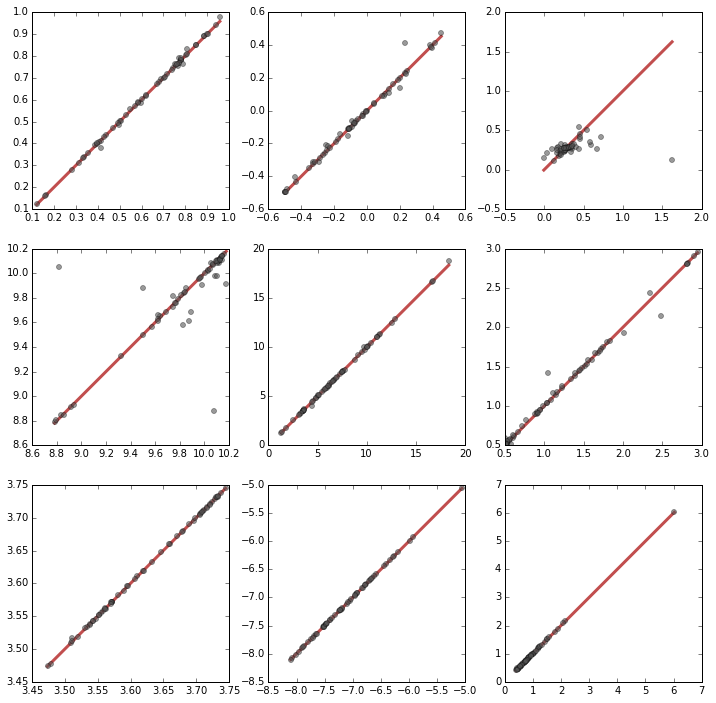

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(12., 12.))

for i in range(9):
    row = i/3
    col = i%3
    axis = ax[row, col]
    
    axis.plot([min(kde_pbr[:, i]), max(kde_pbr[:, i])], [min(kde_pbr[:, i]), max(kde_pbr[:, i])], 
                  '-', lw=3, c='#b22222', alpha=0.8)
    axis.plot(kde_pbr[:, i], kde_fbr[:, i], 'o', markersize=5.0, c='#555555', alpha=0.6)

Panel 3 in the top right shows estimates for the helium abundance, which was not constrained in this run, and my be safely ignored for comparing the validity of the two methods. Both methods yields similar results with some difference in the inferred age and mixing length. However, they do not appear to significntly affect the results. It is therefore seems most reasonable to use the KDEs computed using bootstrap resampled posteriors from the full MCMC simulations (probability weighted).

How does this compare to results where we compute the KDE from the resulting posterior distributions of the MCMC simluation, without weighting results by their probability (a second time)?

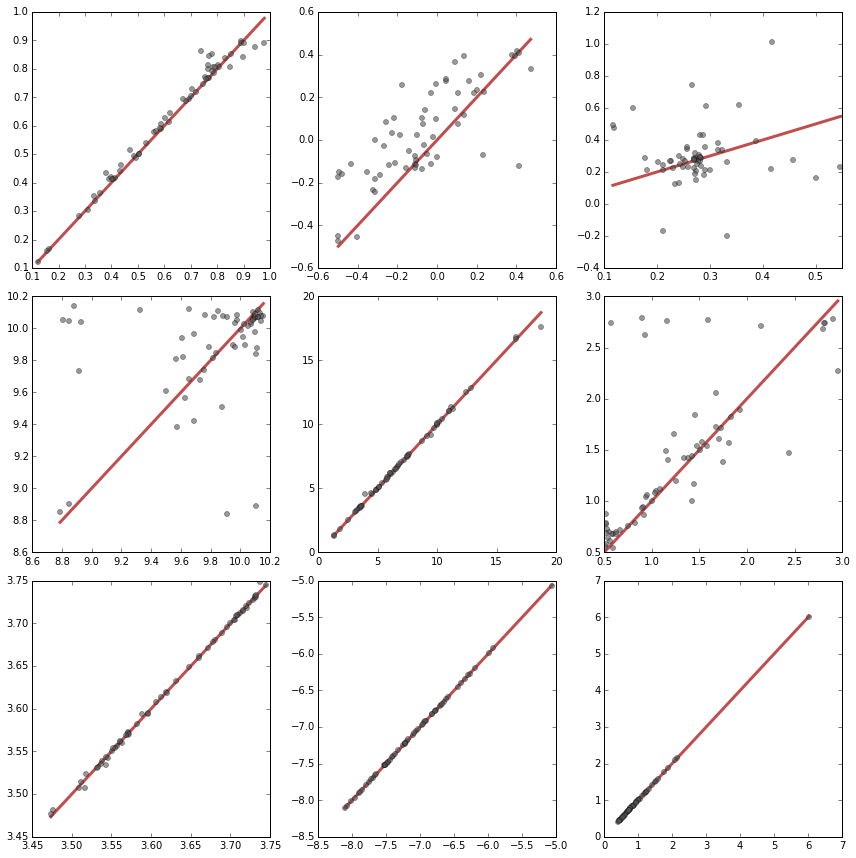

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(12., 12.))

for i in range(9):
    row = i/3
    col = i%3
    axis = ax[row, col]
    
    axis.plot([min(kde_fbr[:, i]), max(kde_fbr[:, i])], [min(kde_fbr[:, i]), max(kde_fbr[:, i])], 
                  '-', lw=3, c='#b22222', alpha=0.8)
    axis.plot(kde_fbr[:, i], kde_pdf[:, i], 'o', markersize=5.0, c='#555555', alpha=0.6)
fig.tight_layout()

Results in this case are quite striking. Ages, mixing lengths, and metallicities all appear quite different between the two modal estimates from their respective KDEs. With metallicities, we find that the KDE applied directly to the posterior distribution function from the MCMC simluation produces metallicities that are up to 0.2 dex higher than when we resample the posterior. We also find that ages tend to be older when using the raw posterior distributions. Similarly, there is a propensity for the raw posteriors to produce higher mixing length parameters as compared to the resampled posterior. 

---

How do these differences affect the resulting relationships that we derive for the mixing length parameter as a funciton of stellar properties? Let's look at the same two final sets of inferred parameters as the previous figure.

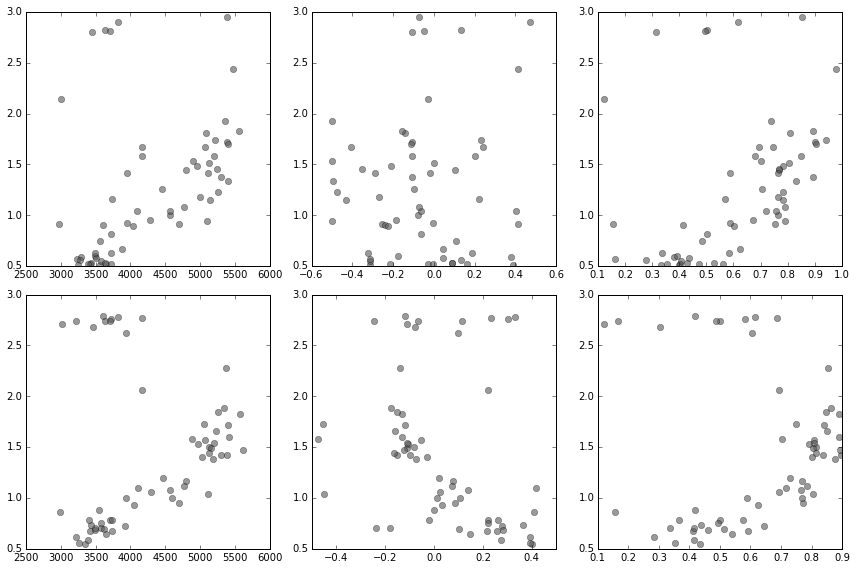

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(12., 8.))

# Full Resampled KDE
ax[0, 0].plot(10**kde_fbr[:, 6], kde_fbr[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)
ax[0, 1].plot(kde_fbr[:, 1], kde_fbr[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)
ax[0, 2].plot(kde_fbr[:, 0], kde_fbr[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)

# Raw KDE
ax[1, 0].plot(10**kde_pdf[:, 6], kde_pdf[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)
ax[1, 1].plot(kde_pdf[:, 1], kde_pdf[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)
ax[1, 2].plot(kde_pdf[:, 0], kde_pdf[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)

fig.tight_layout()

Herein lies a problem. How we compute the modal value can alter the results. To see what effect this has on inferred correlations, let's compare Spearman, Pearson, and Kendall correlation tests.

In [6]:
import scipy.stats as stats

First, Spearman $r$ rank-order correlation coefficient. For resampled distribution:

In [7]:
stats.spearmanr(10**kde_fbr[:, 6], kde_fbr[:, 5]), \
    stats.spearmanr(kde_fbr[:, 1], kde_fbr[:, 5]), \
    stats.spearmanr(kde_fbr[:, 0], kde_fbr[:, 5])

((0.61078794288736116, 1.7204940034925061e-07),
 (-0.035854045478582758, 0.78383560846760425),
 (0.57683765203595982, 1.1402579675945087e-06))

In [8]:
stats.spearmanr(10**kde_pdf[:, 6], kde_pdf[:, 5]), \
    stats.spearmanr(kde_pdf[:, 1], kde_pdf[:, 5]), \
    stats.spearmanr(kde_pdf[:, 0], kde_pdf[:, 5])

((0.41713379164463243, 0.00082467383678972036),
 (-0.44145954521417236, 0.00036887967247576178),
 (0.3496562665256478, 0.0057416826385729503))

Now for Pearson $\rho$ correlation coefficients.

In [9]:
stats.pearsonr(10**kde_fbr[:, 6], kde_fbr[:, 5]), \
    stats.pearsonr(kde_fbr[:, 1], kde_fbr[:, 5]), \
    stats.pearsonr(kde_fbr[:, 0], kde_fbr[:, 5])

((0.4116379625505609, 0.00098101188537731655),
 (0.064272751972639791, 0.62264118399962765),
 (0.37450793072297334, 0.0029440178110774185))

In [10]:
stats.pearsonr(10**kde_pdf[:, 6], kde_pdf[:, 5]), \
    stats.pearsonr(kde_pdf[:, 1], kde_pdf[:, 5]), \
    stats.pearsonr(kde_pdf[:, 0], kde_pdf[:, 5])

((0.15169711568508995, 0.24319005461621984),
 (-0.30572151117465296, 0.016573334441289618),
 (0.076373200976712158, 0.55854161687453452))

And finally, Kendall $\tau$ correlation coefficients.

In [11]:
stats.kendalltau(10**kde_fbr[:, 6], kde_fbr[:, 5]), \
    stats.kendalltau(kde_fbr[:, 1], kde_fbr[:, 5]), \
    stats.kendalltau(kde_fbr[:, 0], kde_fbr[:, 5])

((0.48196721311475421, 4.0510749784808637e-08),
 (-0.031693989071038257, 0.71815249090468813),
 (0.44371584699453565, 4.349088215201627e-07))

In [12]:
stats.kendalltau(10**kde_pdf[:, 6], kde_pdf[:, 5]), \
    stats.kendalltau(kde_pdf[:, 1], kde_pdf[:, 5]), \
    stats.kendalltau(kde_pdf[:, 0], kde_pdf[:, 5])

((0.34644808743169409, 7.9690875591035377e-05),
 (-0.34098360655737714, 0.00010313368719670999),
 (0.28087431693989079, 0.0013810712824039208))

The results can largely be inferred by visiual inspection of the two sets of data. In the case of bootstrap resampled inferences, the two dominant correlations are between temperature and mass, while there is not clear correlation with metallicity. For this data, the Pearson $\rho$ correlation coefficient is not necessarily a reasonable test, given that there is not necessarily a linear relationship between the different parameters. However, both Kendall $\tau$ and Spearman $r$ correlation coefficients, which do not assume linearity, show what could be significant trends with temperature and mass. These trends are far more significant when we use a bootstrapped resampled KDE as opposed to the raw MCMC simluation results. 

This is quite concerning, since one wishes to have a single unique modal value that is relatively independent of the method used for estimating it. Is there something behind the differences? I postulate that the differences may be due to the adopted metallicity uncertainties and whether one wishes to place more confidence in the observed values. As a test, I recomputed the bootstrap resampled estimates using a larger uncertainty on the metallicity (0.2 dex instead of 0.05 dex) to see if that produces a significant differences in the results.

In [13]:
kde_fbr2 = np.genfromtxt('data/run08_kde_props_tmp3.txt')

Comparing with the KDE computed from the raw posterior distributions,

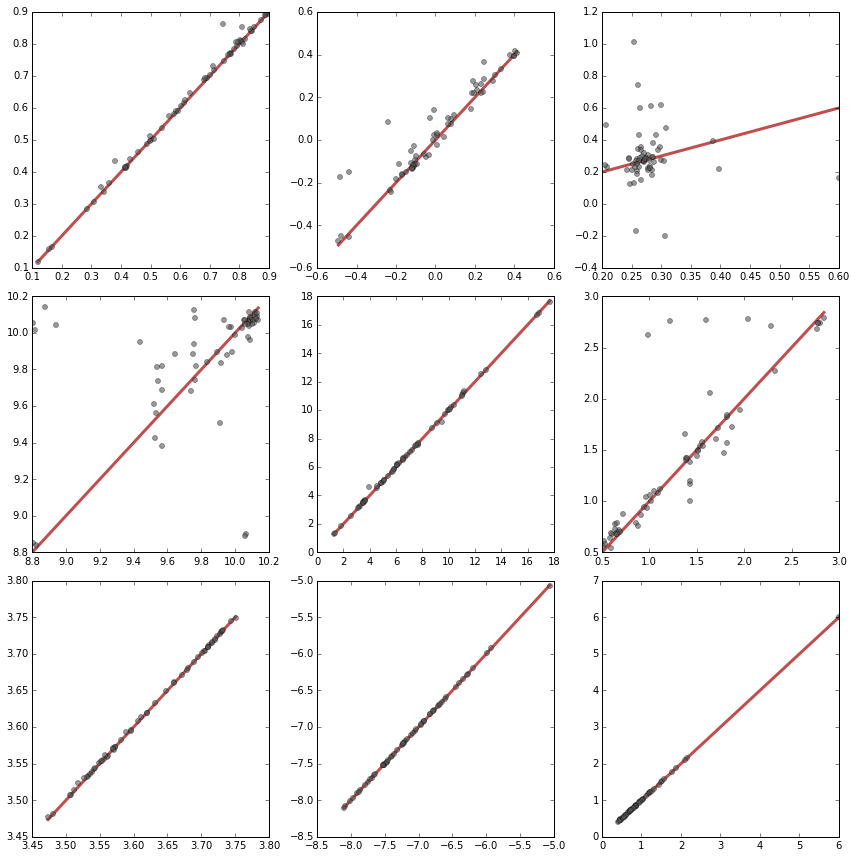

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(12., 12.))

for i in range(9):
    row = i/3
    col = i%3
    axis = ax[row, col]
    
    axis.plot([min(kde_fbr2[:, i]), max(kde_fbr2[:, i])], [min(kde_fbr2[:, i]), max(kde_fbr2[:, i])], 
                  '-', lw=3, c='#b22222', alpha=0.8)
    axis.plot(kde_fbr2[:, i], kde_pdf[:, i], 'o', markersize=5.0, c='#555555', alpha=0.6)
    
fig.tight_layout()

Here we find that the results, while still producing different estimates for ages and mixing lengths, largely reproduces the metallicities inferred from the raw KDE maximum.

What do the resulting comparisons with stellar properties look like?

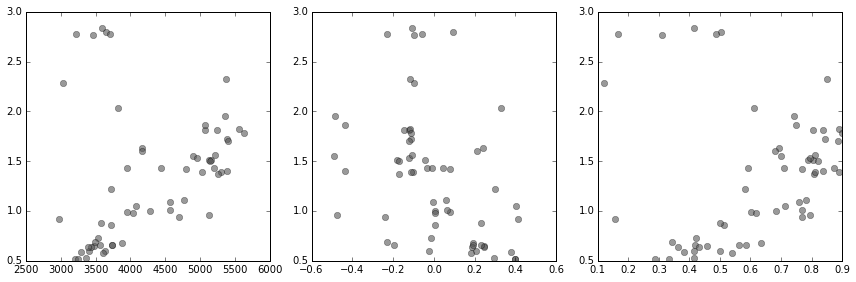

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12., 4.))

# Full Resampled KDE, wider [Fe/H] uncertainty (weaker prior)
ax[0].plot(10**kde_fbr2[:, 6], kde_fbr2[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)
ax[1].plot(kde_fbr2[:, 1], kde_fbr2[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)
ax[2].plot(kde_fbr2[:, 0], kde_fbr2[:, 5], 'o', markersize=6., c='#555555', alpha=0.6)

fig.tight_layout()

And the Spearman $r$ rank-correlation coefficients from the above comparisons,

In [16]:
stats.spearmanr(10**kde_fbr2[:, 6], kde_fbr2[:, 5]), \
    stats.spearmanr(kde_fbr2[:, 1], kde_fbr2[:, 5]), \
    stats.spearmanr(kde_fbr2[:, 0], kde_fbr2[:, 5])

((0.47747223691168689, 9.9831357866661354e-05),
 (-0.48947646747752516, 6.2462136290137419e-05),
 (0.39841353781068212, 0.0014721595602496676))

We recover the metallicity correlation. In fact, the recovered rank-correlation coefficients are fully consistent with modal values computed from the raw posterior distributions. This result highlights the sensitivity of the resulting correlation between metallicity and mixing length parameter with our confidence in the observed metallicities (weak or strong prior).

Critically, the strength of the metallicity prior _does not_ alter the inferred correlations between mass and $T_{\rm eff}$ with $\alpha_{\rm MLT}$. These two trends appear robust against our prior assumptions regarding the metallicity measurement uncertianty.

---

### Tri-linear analysis

To compare with other works in the literature, a tri-linear analysis should be performed so that we can simultaneously extract how $\alpha$ varies as a function of multiple parameters.

In [17]:
import statsmodels.api as sm

First we need to reorganize the data so that we have an array with only the desired quantities.

In [18]:
fit_data_all = kde_fbr2  # include all points
logg_all = np.log10(6.67e-8*fit_data_all[:, 0]*1.988e33/(fit_data_all[:, 26]*6.955e10)**2)

# fit with all points
all_data = np.column_stack((logg_all, fit_data_all[:, 1]))
all_data = np.column_stack((all_data, fit_data_all[:, 6]))
all_data = sm.tools.tools.add_constant(all_data, prepend=True)

# remove noted outliers (high and low alphas)
fit_data_low = np.array([star for star in kde_fbr2 if 0.55 <= star[5] <= 2.5])
logg_low = np.log10(6.67e-8*fit_data_low[:, 0]*1.988e33/(fit_data_low[:, 26]*6.955e10)**2)

# fit to lower sequence
low_data = np.column_stack((logg_low, fit_data_low[:, 1]))
low_data = np.column_stack((low_data, fit_data_low[:, 6]))
low_data = sm.tools.tools.add_constant(low_data, prepend=True)

Perform a trilinear regression to the data.

In [19]:
trifit_all = sm.regression.linear_model.GLS(fit_data_all[:, 5], all_data, sigma=fit_data_all[:, 14]).fit()
trifit_low = sm.regression.linear_model.GLS(fit_data_low[:, 5], low_data, sigma=fit_data_low[:, 14]).fit()

In [20]:
print(trifit_all.summary())  # All data points included

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            GLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     37.37
Date:                Wed, 09 Sep 2015   Prob (F-statistic):           1.74e-13
Time:                        16:39:58   Log-Likelihood:                -33.578
No. Observations:                  61   AIC:                             75.16
Df Residuals:                      57   BIC:                             83.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -65.8919     12.002     -5.490      0.0

When fitting data for all stars, we find probable cause to reject the null hypothesis for perceived correlations between the effective temperature, log(g), and the convective mixing length parameters. However, we find that we are unable to reject the null hypothesis when testing whether metallicities and mixing length parameters are correlated. It should be noted that a linear model does not provide a good description of the data, as indicated by the poor fit quality ($R = 0.66$). Qualitative assessment of figures above suggests this would have been the case, as mixing length parameters for the lowest mass stars form two sub-populations: one at higher $\alpha$ and the other at low $\alpha$.

In [21]:
print(trifit_low.summary())  # "outliers" removed

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            GLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     88.48
Date:                Wed, 09 Sep 2015   Prob (F-statistic):           8.68e-20
Time:                        16:39:58   Log-Likelihood:                -3.8273
No. Observations:                  53   AIC:                             15.65
Df Residuals:                      49   BIC:                             23.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -61.2956      7.912     -7.747      0.0

A linear model performs well for fitting the subset of the data where points affected by grid boundaries have been removed ($R = 0.84$). Assuming a significance test of $p < 0.01$, we would reject the null hypothesis for all three parameters, finding plausible evidence that the correlations shown above are not the result of randomness. 

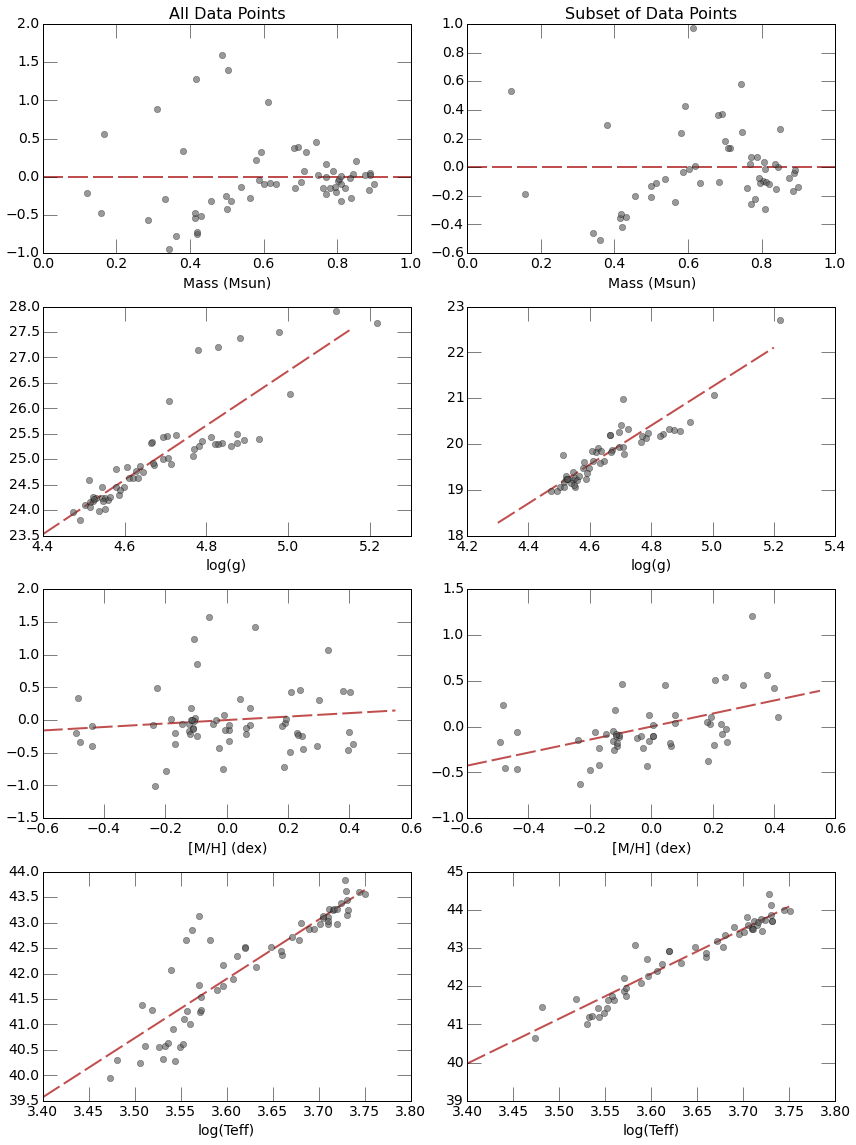

In [22]:
fig, ax = plt.subplots(4, 2, figsize=(12., 16.))

for row in ax:
    for axis in row:
        axis.tick_params(which='major', axis='both', length=14., labelsize=14.)

#=================
# All data
#
b0, b1, b2, b3 = trifit_all.params
# total residuals
ax[0, 0].set_title('All Data Points', fontsize=16.)
ax[0, 0].set_xlabel('Mass (Msun)', fontsize=14.)
ax[0, 0].plot([0.0, 1.0], [0.0, 0.0], dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[0, 0].plot(fit_data_all[:, 0], trifit_all.resid, 'o', c='#555555', alpha=0.6)

# variations with b1 (mass)
loggs  = np.arange(4.4, 5.2, 0.05)
depend = fit_data_all[:, 5] - b0 - b2*fit_data_all[:, 1] - b3*fit_data_all[:, 6]
ax[1, 0].set_xlabel('log(g)', fontsize=14.)
ax[1, 0].plot(loggs, loggs*b1, dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[1, 0].plot(logg_all, depend, 'o', c='#555555', alpha=0.6)

# variations with b2 (metallicity)
metals = np.arange(-0.6, 0.60, 0.05)
depend = fit_data_all[:, 5] - b0 - b1*logg_all - b3*fit_data_all[:, 6]
ax[2, 0].set_xlabel('[M/H] (dex)', fontsize=14.)
ax[2, 0].plot(metals, metals*b2, dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[2, 0].plot(fit_data_all[:, 1], depend, 'o', c='#555555', alpha=0.6)

# variations with b3 (logTeff)
logT   = np.arange(3.4, 3.75, 0.05)
depend = fit_data_all[:, 5] - b0 - b1*logg_all - b2*fit_data_all[:, 1]
ax[3, 0].set_xlabel('log(Teff)', fontsize=14.)
ax[3, 0].plot(logT, logT*b3, dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[3, 0].plot(fit_data_all[:, 6], depend, 'o', c='#555555', alpha=0.6)

#=================
# Outliers removed
#
b0, b1, b2, b3 = trifit_low.params
# total residuals
ax[0, 1].set_title('Subset of Data Points', fontsize=16.)
ax[0, 1].set_xlabel('Mass (Msun)', fontsize=14.)
ax[0, 1].plot([0.0, 1.0], [0.0, 0.0], dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[0, 1].plot(fit_data_low[:, 0], trifit_low.resid, 'o', c='#555555', alpha=0.6)

# variations with b1 (mass)
loggs  = np.arange(4.3, 5.2, 0.05)
depend = fit_data_low[:, 5] - b0 - b2*fit_data_low[:, 1] - b3*fit_data_low[:, 6]
ax[1, 1].set_xlabel('log(g)', fontsize=14.)
ax[1, 1].plot(loggs, loggs*b1, dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[1, 1].plot(logg_low, depend, 'o', c='#555555', alpha=0.6)

# variations with b2 (metallicity)
metals = np.arange(-0.6, 0.60, 0.05)
depend = fit_data_low[:, 5] - b0 - b1*logg_low - b3*fit_data_low[:, 6]
ax[2, 1].set_xlabel('[M/H] (dex)', fontsize=14.)
ax[2, 1].plot(metals, metals*b2, dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[2, 1].plot(fit_data_low[:, 1], depend, 'o', c='#555555', alpha=0.6)

# variations with b3 (logTeff)
logT   = np.arange(3.4, 3.75, 0.05)
depend = fit_data_low[:, 5] - b0 - b1*logg_low - b2*fit_data_low[:, 1]
ax[3, 1].set_xlabel('log(Teff)', fontsize=14.)
ax[3, 1].plot(logT, logT*b3, dashes=(20., 5.), lw=2, c='#b22222', alpha=0.8)
ax[3, 1].plot(fit_data_low[:, 6], depend, 'o', c='#555555', alpha=0.6)

fig.tight_layout()

On the left, we have residuals and partial resdiuals when all data points are used in the trilinear analysis. On the right, the same for when points affected by the grid boundaries have been removed. The top two panels show total residuals of the fit to mixing length parameters as a function of inferred stellar mass. There are issues at the lowest masses in both instances, either due to the influence of low mass stars with high values for the inferred mixing length parameters, or because there is a genuine change of slope in the relation that is not adequately reproduced by a linear model. This change of slope may be the result of not treating atmospheric physics self-consistently (fixed $\alpha = 1.5$), which may affect cool stars where convective is occuring in the outer, optically thin layers.

Partial residuals are shown in the bottom six panels. These isolate the impact of the given independent variables on the dependent variable (here $\alpha$). Therefore, we see that in each case, there is a direct correlation between the dependent parameter (stellar properties) and $\alpha$, with the exception of the metallicity on the left-hand side for which we cannot rule out the null hypothesis that the correlation is the result of random scatter. For the rest of the cases, the correlations are readily apparent. 

We can thus conclude that, for our sample of stars under the model conditions/assumptions present in the Dartmouth models, the mixing length parameters is: (1) directly correlated with log(g) and log(Teff) and (2) plausibly correlated with metallicity. 

Would like to construct a figure like Figure 5 from Ludwig, Freytag, & Steffen (1999). In lieu of that (for the moment), we can compute our value for the mixing length at some of their grid points. 

In [23]:
logg = 4.44
logT = np.log10(4500.)
Fe_H = 0.0

print("Our alpha: {:5.3f}; LFS alpha: 1.7".format(b0 + b1*logg + b2*Fe_H + b3*logT))

Our alpha: 0.531; LFS alpha: 1.7


In [24]:
logg = 4.44
logT = np.log10(5770.)
Fe_H = 0.0

print("Our alpha: {:5.3f}; LFS alpha: 1.6".format(b0 + b1*logg + b2*Fe_H + b3*logT))

Our alpha: 1.800; LFS alpha: 1.6


Key take away is that, whereas LFS predict a decrease in alpha as a function of Teff, we predict an increase. Curiously, we should note that we very nearly recover our solar calibrated value for the Sun from our fit:

In [25]:
logg = 4.44
logT = np.log10(5778.)  # Note: differs from new IAU recommended value (5771.8)
Fe_H = 0.0

print("Fit alpha: {:5.3f}; Solar alpha: 1.884".format(b0 + b1*logg + b2*Fe_H + b3*logT))

Fit alpha: 1.807; Solar alpha: 1.884


There is an approximately 4% difference between the extrapolated solar mixing length and the true solar calibrated value. For comparison, the mixing length trilinear fit presented by Bonaca et al. (2012) yields a solar mixing length parameters 6% lower than their solar calibrated value -- again, quite good agreement given that this did not necessarily _need_ to be the case.